	了解您的控制算法对两个控制坝的出流的敏感性。根据年的数据，您的新控制是否会导致各利益相关者在那一年获得满意或比实际记录的水位更好的结果？
模拟年的流入流出控制结果，然后计算目标函数值，看看是否有更好的结果


	您的算法对环境条件变化（例如，降水、冬季积雪、冰堵塞）有多敏感？
做一些假设，往约束条件中加入此类环境条件变化对两个控制坝的影响，然后做敏感性分析

	将您广泛的分析重点仅放在影响安大略湖的利益相关者和因素上，因为最近对该湖的水位管理产生了更多关注。
修正一下利益相关者，使得其更倾向安大略湖



两座控制大坝——Sault Ste. Marie的补偿工程（通常称为“Soo Locks”）和位于圣劳伦斯河的Moses-Saunders大坝，对五大湖的水位有显著的影响，主要通过调节从湖泊流出的水量来实现。下面是这两座大坝如何影响五大湖水位的具体方式以及它们所在的位置和直接影响的湖泊：

### Soo Locks（Sault Ste. Marie的补偿工程）
- **位置**：位于美国密歇根州的Sault Ste. Marie，连接苏必利尔湖和休伦湖。
- **直接影响**：这些锁主要允许船只绕过圣玛丽河上的急流，从苏必利尔湖安全地进入休伦湖，因此直接影响苏必利尔湖和休伦湖的水位。
- **水位控制**：通过调节通过锁系统的水流量，可以在一定程度上控制从苏必利尔湖流向休伦湖的水量，从而影响这两个湖泊的水位。

### Moses-Saunders Power Dam（Moses-Saunders大坝）
- **位置**：位于圣劳伦斯河上，连接安大略湖和圣劳伦斯河。
- **直接影响**：这座大坝直接影响安大略湖的水位，因为它控制了从安大略湖流入圣劳伦斯河的水量。
- **水位控制**：通过调整大坝的出流量，可以影响安大略湖的水位，进而间接影响上游湖泊（包括伊利湖、圣克莱尔湖、休伦湖和密歇根湖）的水位。



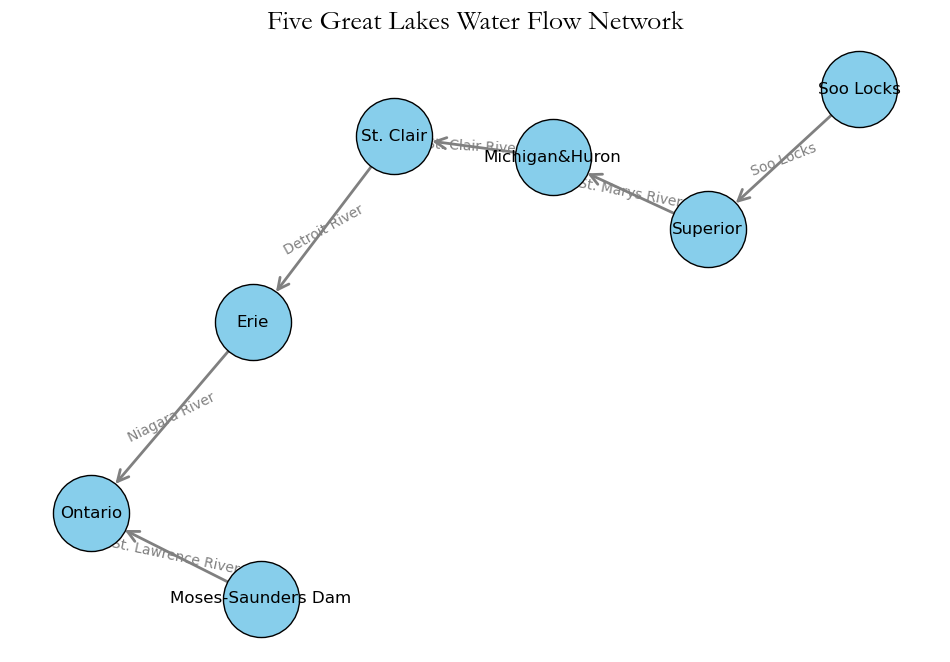

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')
def visualize_water_flow_network():
    # 创建有向图
    water_flow_network = nx.DiGraph()

    # 添加节点
    lake_nodes = ['Superior', 'Michigan&Huron', 'St. Clair', 'Erie', 'Ontario', 'Soo Locks', 'Moses-Saunders Dam']
    water_flow_network.add_nodes_from(lake_nodes)

    # 更新边属性，将流量容量替换为河流名称，并添加大坝对水位的影响
    edges_with_rivers = [
        ('Superior', 'Michigan&Huron', {'river': 'St. Marys River'}),
        ('Michigan&Huron', 'St. Clair', {'river': 'St. Clair River'}),
        ('St. Clair', 'Erie', {'river': 'Detroit River'}),
        ('Erie', 'Ontario', {'river': 'Niagara River'}),
        ('Soo Locks', 'Superior', {'river': 'Soo Locks'}),
        ('Moses-Saunders Dam', 'Ontario', {'river': 'St. Lawrence River'})
    ]
    water_flow_network.add_edges_from(edges_with_rivers)

    # 使用spring_layout进行节点位置布局
    node_positions = nx.spring_layout(water_flow_network)

    # 绘制网络图
    plt.figure(figsize=(12, 8))

    # 节点标签
    node_labels = {node: node for node in lake_nodes}
    nx.draw_networkx_labels(water_flow_network, node_positions, labels=node_labels, font_size=12, font_color='black', font_family='sans-serif')

    # 边标签（显示河流名称）
    edge_labels = {(u, v): data['river'] for u, v, data in water_flow_network.edges(data=True)}
    nx.draw_networkx_edge_labels(water_flow_network, node_positions, edge_labels=edge_labels, font_size=10, font_color='gray')

    # 绘制图形
    nx.draw_networkx(
        water_flow_network,
        node_positions,
        with_labels=False,
        node_size=3000,
        node_color='skyblue',
        edge_color='gray',
        width=2,
        edgecolors='black',
        arrowstyle='->',
        arrowsize=20
    )

    # 添加标题和关闭坐标轴
    plt.title("Five Great Lakes Water Flow Network", size=20)
    plt.axis("off")
    plt.show()

# 调用函数绘制水流网络图
visualize_water_flow_network()


In [9]:
import pandas as pd

# 从CSV文件中读取水位数据
water_level_data = pd.read_csv('data.csv')

# 获取并显示数据的信息
data_info = water_level_data.info()

# 获取并显示数据的前几行
data_head = water_level_data.head()

# 获取湖泊的唯一源头
unique_sources = water_level_data['Source'].unique()

# 计算每个湖泊的历史平均水位
lake_means = water_level_data.groupby('Source').mean().drop(columns='Year')

# 计算理想水位（使用各湖泊历史平均水位的平均值）
ideal_water_levels = lake_means.mean(axis=1)

# 在这个简化模型中，我们假设理想水位为各湖泊历史平均水位
# 实际应用中，需使用线性规划等优化算法，并考虑约束条件
# 在这里，我们仅计算平均水位与理想水位的差异总和
# 这段代码用于展示如何处理该问题，而不是实际的约束编程实现

# 显示理想水位
ideal_water_levels


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  253 non-null    object 
 1   Year    253 non-null    int64  
 2   Jan     253 non-null    float64
 3   Feb     253 non-null    float64
 4   Mar     253 non-null    float64
 5   Apr     253 non-null    float64
 6   May     253 non-null    float64
 7   Jun     253 non-null    float64
 8   Jul     253 non-null    float64
 9   Aug     253 non-null    float64
 10  Sep     253 non-null    float64
 11  Oct     253 non-null    float64
 12  Nov     253 non-null    float64
 13  Dec     253 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 27.8+ KB


Source
Detroit River - Flow                               5862.666542
Lake Erie - Mean Water Level                        174.280761
Lake Michigan and Lake Huron - Mean Water Level     176.328913
Lake Ontario - Mean Water Level                      74.829783
Lake St. Clair - Mean Water Level                   175.103043
Lake Superior - Mean Water Level                    183.346413
Niagara River - Flow at Buffalo                    6005.198413
Ottawa River - Flow at Carillon                    2061.254117
St. Clair River - Flow                             5626.055714
St. Lawrence River - Flow at Cornwall              7833.361458
St. Mary's River - Flow                            2168.235905
dtype: float64

In [10]:
# 计算每个湖泊的历史最大水位
lake_max = water_level_data.groupby('Source').max().drop(columns='Year')

# 计算理想最大水位（使用各湖泊历史最大水位的平均值）
ideal_water_max = lake_max.max(axis=1)

# 在这个简化模型中，我们假设理想水位为各湖泊历史最大水位的平均值
# 实际应用中，需使用线性规划等优化算法，并考虑约束条件
# 在这里，我们仅计算历史最大水位与理想最大水位的差异总和
# 这段代码用于展示如何处理该问题，而不是实际的约束编程实现

# 显示理想最大水位
ideal_water_max


Source
Detroit River - Flow                                7676.696374
Lake Erie - Mean Water Level                         175.140000
Lake Michigan and Lake Huron - Mean Water Level      177.450000
Lake Ontario - Mean Water Level                       75.910000
Lake St. Clair - Mean Water Level                    176.040000
Lake Superior - Mean Water Level                     183.880000
Niagara River - Flow at Buffalo                     8070.000000
Ottawa River - Flow at Carillon                     7731.000000
St. Clair River - Flow                              7011.250543
St. Lawrence River - Flow at Cornwall              10420.598545
St. Mary's River - Flow                             3191.308305
dtype: float64

In [11]:
import numpy as np
from scipy.optimize import minimize

# 假设两座大坝对水位的影响
dam_impact_soo_locks = 1  # 假设Soo Locks的影响为5，可以根据实际情况调整
dam_impact_moses_saunders = 1  # 假设Moses-Saunders Dam的影响为3，可以根据实际情况调整
nodes = ['Superior', 'Michigan&Huron', 'St. Clair', 'Erie', 'Ontario']
# 创建存储结果的列表
result_list = []

for i in range(1, 11):
    dam_impact_soo_locks += i / 10

    # 假设的理想水位和河流最大容量
    ideal_levels = {'Superior': 183.35, 'Michigan&Huron': 176.33, 'St. Clair': 175.10, 'Erie': 174.28, 'Ontario': 74.83}
    max_flow_capacity = {'St. Marys River': 3191.308305, 'St. Clair River': 7011.250543,
                         'Detroit River': 7676.696374, 'Niagara River': 8070.000000}

    for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
        marys_flow = data[data['Source'] == "St. Mary's River - Flow "][month].mean(numeric_only=True)
        clair_flow = data[data['Source'] == 'St. Clair River - Flow '][month].mean(numeric_only=True)
        detroit_flow = data[data['Source'] == 'Detroit River - Flow '][month].mean(numeric_only=True)
        niagara_flow = data[data['Source'] == 'Niagara River - Flow at Buffalo'][month].mean(numeric_only=True)

        # 根据大坝的影响调整初始流量
        initial_flows = np.array([marys_flow * dam_impact_soo_locks, clair_flow, detroit_flow,
                                  niagara_flow * dam_impact_moses_saunders])

        # 目标函数：最小化水位差异总和
        def objective(flows):
            return sum(abs(ideal_levels[node] - flows[i] / max_flow_capacity[river]) for i, (node, river) in
                       enumerate(zip(nodes, max_flow_capacity.keys())))

        # 约束条件
        constraints = []

        # 流量非负约束
        bounds = [(0, max_flow_capacity[river]) for river in max_flow_capacity]

        # 求解优化问题
        result = minimize(objective, initial_flows, bounds=bounds, method='SLSQP')
        optimized_levels = result.x
        objective_value = objective(optimized_levels)
        result_list.append([i, month, result.fun])

# 将结果存储在DataFrame中或进行其他分析
result_df = pd.DataFrame(result_list, columns=['Iteration', 'Month', 'ObjectiveValue'])


In [12]:
pd.DataFrame(result_list,columns=['dam_impact_SooLocks','month' ,'Deviation']).to_csv('Q3_1.csv',index=None)

In [13]:
data1=pd.DataFrame(result_list,columns=['dam_impact_SooLocks','month' ,'Deviation'])

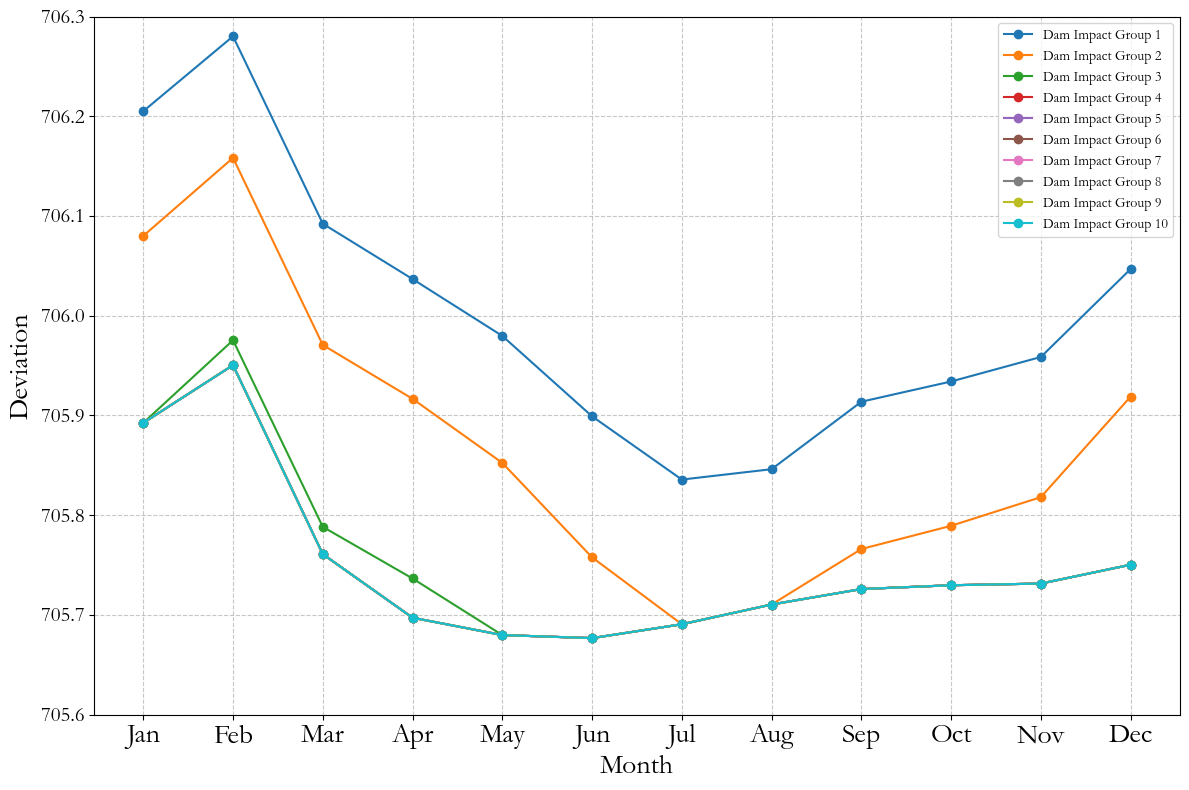

In [33]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import the colormap module
plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'
# Convert months to a sortable format by creating a mapping from month to number
month_to_num = {month: i + 1 for i, month in enumerate(['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])}
# Add a numeric month column
data1['month_num'] = data1['month'].map(month_to_num)

# Group by 'dam_impact_SooLocks' and plot a line chart for each group
plt.figure(figsize=(12, 8))

# Use a distinct color palette for better distinction between groups
color_palette = cm.tab10.colors

for i, (dam_impact_group, group_data) in enumerate(data1.groupby('dam_impact_SooLocks')):
    # Sort each group by month
    sorted_group_data = group_data.sort_values(by='month_num')
    
    # Use a distinct color for each group
    plt.plot(sorted_group_data['month'], sorted_group_data['Deviation'], marker='o', linestyle='-', color=color_palette[i], label=f'Dam Impact Group {dam_impact_group}')

# Set plot title, labels, and customize appearance
# plt.title('Deviation by Month for Each Dam Impact SooLocks Group')
plt.xlabel('Month',fontsize=20)
plt.ylabel('Deviation', fontsize=20)
plt.ylim(705.6, 706.3)  # Adjusted y-axis limits
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(r'C:\Users\Jiacheng Zheng\Desktop\ICM\ICM2024\Q3\Q3_2.svg', format='svg', bbox_inches='tight')
plt.show()


In [29]:
import numpy as np
from scipy.optimize import minimize

# Assume two dams' impact on water levels
impact_soo_locks = 1
impact_moses_saunders = 1

optimized_results = []

# Iterate over different impacts of Moses-Saunders Dam
for i in range(1, 21):
    impact_moses_saunders = i / 10 + impact_soo_locks

    # Assume ideal water levels and maximum flow capacity for each river
    ideal_levels = {'Superior': 183.35, 'Michigan&Huron': 176.33, 'St. Clair': 175.10, 'Erie': 174.28, 'Ontario': 74.83}
    max_flow_capacity = {'St. Marys River': 3191.308305, 'St. Clair River': 7011.250543, 'Detroit River': 7676.696374, 'Niagara River': 8070.0}
for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    st_marys_data = data[data['Source'] == "St. Mary's River - Flow "][month]
    non_numeric_values = st_marys_data[~st_marys_data.apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
    if not non_numeric_values.empty:
        print(f"Non-numeric values in 'St. Mary's River - Flow' for {month}: {non_numeric_values}")

        # Extract mean flows for each river
        marys_flow = data[data['Source'] == "St. Mary's River - Flow "].mean()[month]
        clair_flow = data[data['Source'] == 'St. Clair River - Flow '].mean()[month]
        detroit_flow = data[data['Source'] == 'Detroit River - Flow '].mean()[month]
        niagara_flow = data[data['Source'] == 'Niagara River - Flow at Buffalo'].mean()[month]

        # Adjust initial flows based on dam impacts
        initial_flows = np.array([marys_flow * impact_soo_locks, clair_flow, detroit_flow, niagara_flow * impact_moses_saunders])

        # Objective function: Minimize the sum of water level differences
        def objective(flows):
            return sum(abs(ideal_levels[node] - flows[i] / max_flow_capacity[river]) for i, (node, river) in enumerate(zip(nodes, max_flow_capacity.keys())))

        # Constraints
        constraints = []

        # Non-negativity constraint for flows
        bounds = [(0, max_flow_capacity[river]) for river in max_flow_capacity]

        # Solve the optimization problem
        result = minimize(objective, initial_flows, bounds=bounds, method='SLSQP')
        optimized_levels = result.x
        objective_value = objective(optimized_levels)
        optimized_results.append([i, month, result.fun])

# Store the results in a DataFrame or perform further analysis


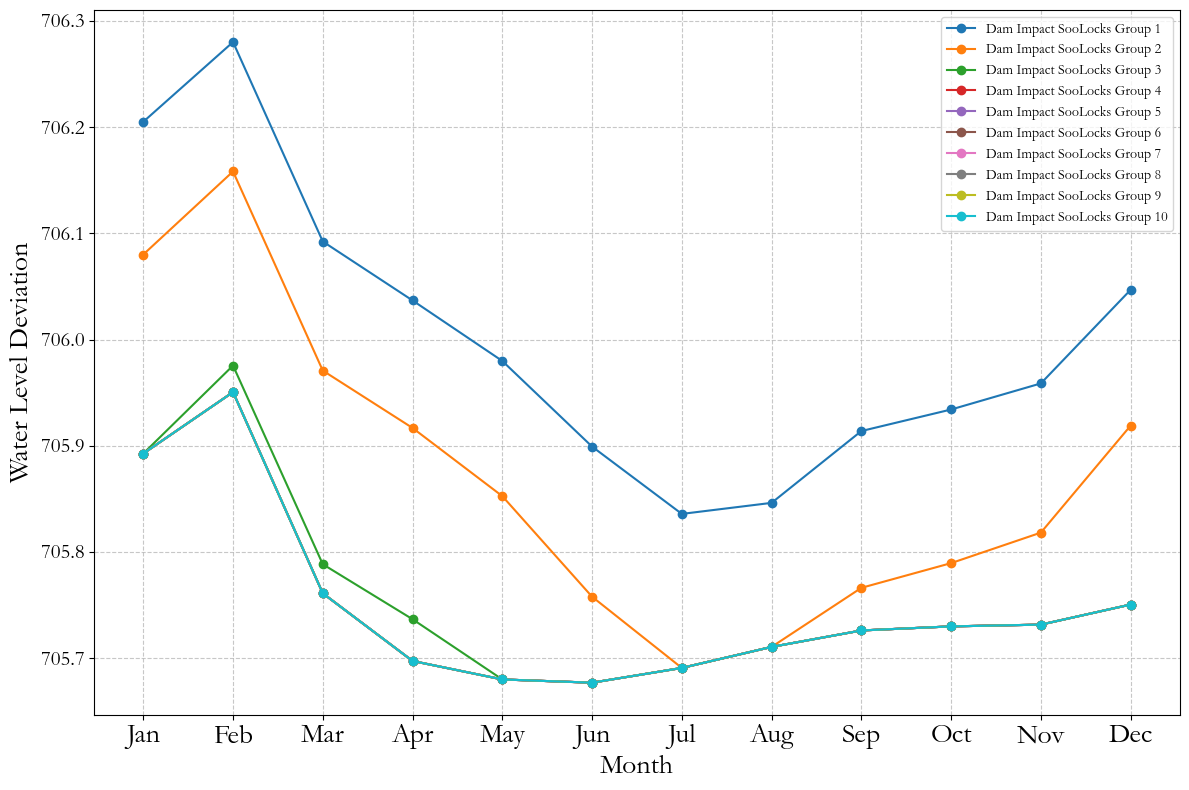

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'
# Create a DataFrame to store optimization results
optimization_results = pd.DataFrame(result_list, columns=['Dam Impact SooLocks', 'Month', 'Water Level Deviation'])

# Convert months to a sortable format by creating a mapping from month to number
month_to_num = {month: i + 1 for i, month in enumerate(['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])}
# Add a numeric month column
optimization_results['Month Num'] = optimization_results['Month'].map(month_to_num)

# Group by 'Dam Impact SooLocks' and plot a line chart for each group
plt.figure(figsize=(12, 8))

for dam_impact_group, group_data in optimization_results.groupby('Dam Impact SooLocks'):
    # Sort each group by month
    sorted_group_data = group_data.sort_values(by='Month Num')
    plt.plot(sorted_group_data['Month'], sorted_group_data['Water Level Deviation'], marker='o', label=f'Dam Impact SooLocks Group {dam_impact_group}')

# Set plot title, labels, and customize appearance
# plt.title('Water Level Deviation by Month for Each Dam Impact SooLocks Group')
plt.xlabel('Month',fontsize=20)
plt.ylabel('Water Level Deviation',fontsize=20)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(r'C:\Users\Jiacheng Zheng\Desktop\ICM\ICM2024\Q3\Q3_3.svg', format='svg', bbox_inches='tight')
plt.show()


In [17]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

optimized_results = []

# Ideal water levels and maximum flow capacity for each river
ideal_levels = {'Superior': 183.35, 'Michigan&Huron': 176.33, 'St. Clair': 175.10, 'Erie': 174.28, 'Ontario': 74.83}
max_flow_capacity = {'St. Marys River': 3191.308305, 'St. Clair River': 7011.250543, 'Detroit River': 7676.696374, 'Niagara River': 8070.000000}

# Dam impact assumptions
dam_impact_SooLocks = 1  # Assume Soo Locks impact is 5, adjust as needed
dam_impact_MosesSaunders = 1  # Assume Moses-Saunders Dam impact is 3, adjust as needed

# Select data for the year 2017
selected_data = data[data['Year'] == 2017]

for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    Marys = selected_data[selected_data['Source'] == "St. Mary's River - Flow "][month].iloc[0]
    Clair = selected_data[selected_data['Source'] == 'St. Clair River - Flow '][month].iloc[0]
    Detroit = selected_data[selected_data['Source'] == 'Detroit River - Flow '][month].iloc[0]
    Niagara = selected_data[selected_data['Source'] == 'Niagara River - Flow at Buffalo'][month].iloc[0]

    # Adjust initial flows based on dam impacts
    initial_flows = np.array([Marys * dam_impact_SooLocks, Clair, Detroit, Niagara * dam_impact_MosesSaunders])

    def objective(flows):
        # Original objective function: minimize the sum of water level deviations
        return sum(abs(ideal_levels[node] - flows[i] / max_flow_capacity[river]) for i, (node, river) in enumerate(zip(nodes, max_flow_capacity.keys()))) - 0.01 * sum(flows)

    # Constraints
    constraints = []

    # Non-negativity constraint on flows
    bounds = [(0, max_flow_capacity[river]) for river in max_flow_capacity]

    # Solve optimization problem
    result = minimize(objective, initial_flows, bounds=bounds, method='SLSQP')
    optimized_levels = result.x
    initial_objective_value = objective(initial_flows)
    optimized_objective_value = objective(optimized_levels)

    optimized_results.append([month, optimized_levels[0], optimized_levels[1], optimized_levels[2], optimized_levels[3], result.fun, initial_objective_value])

# Store results in a DataFrame or perform further analysis
pd.DataFrame(optimized_results, columns=['Month', 'Marys', 'Clair', 'Detroit', 'Niagara', 'Deviation', 'Deviation_init'])


,Month,Marys,Clair,Detroit,Niagara,Deviation,Deviation_init
0,Jan,3191.308305,7011.250543,7676.696374,8070.0,445.567448,503.814288
1,Feb,3191.308305,7011.250543,7676.696374,8070.0,445.567448,498.088563
2,Mar,3191.308305,7011.250543,7676.696374,8070.0,445.567448,494.487011
3,Apr,3191.308305,7011.250543,7676.696374,8070.0,445.567448,492.544837
4,May,3191.308305,7011.250543,7676.696374,8070.0,445.567448,491.268249
5,Jun,3191.308305,7011.250543,7676.696374,8070.0,445.567448,487.738834
6,Jul,3191.308305,7011.250543,7676.696374,8070.0,445.567448,477.327987
7,Aug,3191.308305,7011.250543,7676.696374,8070.0,445.567448,478.645496
8,Sep,3191.308305,7011.250543,7676.696374,8070.0,445.567448,486.772305
9,Oct,3191.308305,7011.250543,7676.696374,8070.0,445.567448,484.927530


In [46]:
pd.DataFrame(newdf,columns=['month','Marys', 'Clair', 'Detroit', 'Niagara','Deviation','Deviation_init']).to_csv('Q3.csv')